# Logistics Regression 
## Introduction
- Approximately 70% of problems in Data Science are classification problems.
- Classification techniques are an essential part of machine learning and data mining applications. 
- Logistics Regression is a common statistical method for predicting binary classes

##  Linear Regression  vs  Logistics Regression 
- Linear regression is a regression algorithm to predict a continuous output. 
- Logistic regression is a classification algorithm to predict a discrete output. 
- Linear regression uses Ordinary Least Squares (OLE) to estimate parameters.
  - Minimize sum of the squared deviations.  
- Logistic regression use Maximum Likelihood Estimation (MLE) to estimate parameters.   
  - MLE sets the mean and variance as parameters in determining the specific parametric values for a given model.
- Logisti regression use Sigmoid function to map output from linear regression to a value between 0 and 1.
    - Use cutoff value to map the output from Sigmoid  function to 0 (no) or 1 (yes).
 
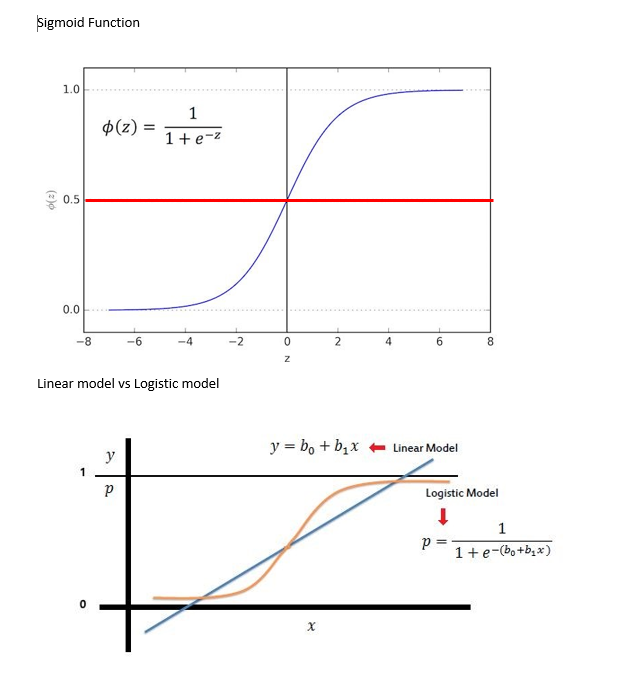




## Titanic Data Set 
- Use Logistics Regression to predict a classification- survival or deceased

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
train = pd.read_csv('titanic_train.csv')
train.info()
train.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


(891, 12)

## Data Explorary Analysis

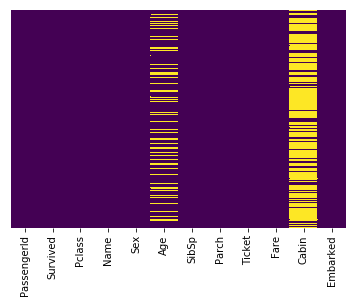

In [14]:
# detect missing values 
# no missing values for most of variables except age, Cabin and Embarked
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

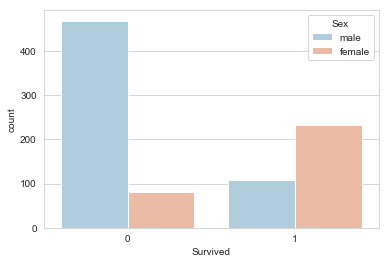

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')  # More female survived

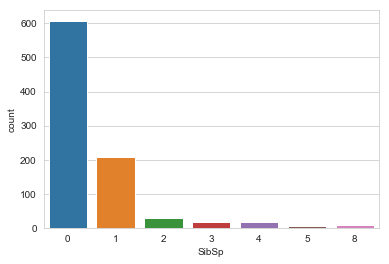

In [16]:
sns.countplot(x='SibSp',data=train)

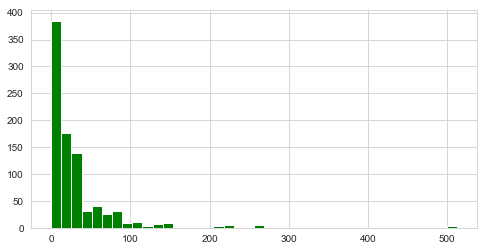

In [17]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

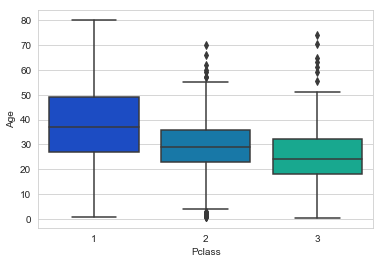

In [18]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

## Data Clean

In [19]:
(train.groupby(["Pclass"]).mean())["Age"]   # Get the average age for each class

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [20]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24

    else:
        return Age

In [21]:
# Base on age in each class to impute age
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)     

In [22]:
# Drop the Cabin column and the row in Embarked that is NaN
train.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)

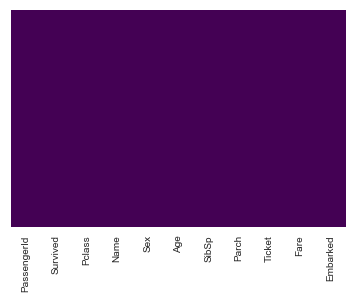

In [23]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')  # no missing value

## Convert Categorical Features

In [25]:
sex = pd.get_dummies(train['Sex'],drop_first=True)  #  Convert categorical variable into dummy/indicator variables

In [26]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [27]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [28]:
sex.columns

Index(['male'], dtype='object')

In [30]:
embark.columns  # 'C' can get  from 'Q' and 'S'

Index(['Q', 'S'], dtype='object')

In [31]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)

In [33]:
train.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Build a Logistic Regression Model

In [34]:
from sklearn.model_selection import train_test_split
X = train.drop('Survived',axis=1)
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [35]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
predictions = logmodel.predict(X_test)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [38]:
from sklearn.metrics import confusion_matrix
print( confusion_matrix ( y_test, predictions))  # type: numpy.ndarray

[[151  12]
 [ 36  68]]


In [39]:
type (confusion_matrix ( y_test, predictions))

numpy.ndarray

In [40]:
print (logmodel.intercept_, logmodel.coef_)

[3.37364347] [[ 4.07955382e-04 -7.86365405e-01 -2.63396134e-02 -2.12110745e-01
  -9.70466787e-02  4.63350974e-03 -2.34157562e+00 -1.74595104e-02
  -1.93376424e-01]]


In [53]:
#X = train.drop('Survived',axis=1)
#cdf = pd.DataFrame(logmodel.coef_,  X.columns, columns = ['Coefficent'] )

## Validation

In [51]:
from sklearn import metrics
y_pred = predictions 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8202247191011236
Precision: 0.85
Recall: 0.6538461538461539


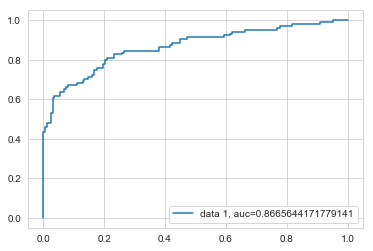

In [52]:
# AUC score for the case is 0.86. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()